In [ ]:
import os

from jax import config
config.update("jax_enable_x64", True)

from bcdmd.build import HostGuestComplexSetup
from bcdmd.simbuilder import HostGuestComplexSimulationBuilder
from bcdmd.simulate import SimulationMD, MDrunAPR
from bcdmd.analysis import APRanalysis

In [2]:
def initialize_APR(pdb_id, system_name):
    var_dict ={'9SL': {'9SL_B': {'G1': ':9SL@N6', 
                                 'G2': ':9SL@C5'},
                       '9SL_A': {'G1': ':9SL@C10',
                                 'G2': ':9SL@O1'}
                      },
               'ANA': {'ANA_A': {'G1': ':ANA@C9',
                                 'G2': ':ANA@C3'},
                       'ANA_B': {'G1': ':ANA@H2',
                                 'G2': ':ANA@C1'}
                      }
              }
    guest = var_dict.get(pdb_id)
    guest_orientation = guest.get(system_name)
    G1 = guest_orientation.get('G1')
    G2 = guest_orientation.get('G2')
    return G1, G2

In [3]:
pdb_id = 'ANA'
system_name = 'ANA_A'

G1, G2 = initialize_APR(pdb_id, system_name)
print(G1, G2)

:ANA@C9 :ANA@C3


In [ ]:
curr_dir = os.getcwd()
apr_dir = f'/mnt/d/Data/bCD-Modelling/bCD_APR/APR_sims/{system_name}'
os.chdir(apr_dir)

In [5]:
HGCS = HostGuestComplexSetup(apr_dir, f'bCD+{system_name}', pdb_id, 'GAFF2')

In [17]:
HGCS.parameterise_structure()
HGCS.positioning_complex(G1, G2)
HGCS.provide_dummies()

DONE...check tleap-log


DONE...check tleap-log


In [6]:
HGCR = HostGuestComplexSimulationBuilder(apr_dir, True, 'GAFF')

initializing attach-pull-release with: [15, 40, 15] windows


In [7]:
HGCR.apply_restraints(G1, G2)

converting atom-names to GAFF
restraints saved to json-file


In [8]:
HGCR.APR_build(guest_id=pdb_id, guest=pdb_id, solvate=False)
HGCR.APR_build(guest_id=pdb_id, guest=pdb_id, solvate=True)

Creating XML for in window a000
Creating XML for in window a001
Creating XML for in window a002
Creating XML for in window a003
Creating XML for in window a004
Creating XML for in window a005
Creating XML for in window a006
Creating XML for in window a007
Creating XML for in window a008
Creating XML for in window a009
Creating XML for in window a010
Creating XML for in window a011
Creating XML for in window a012
Creating XML for in window a013
Creating XML for in window p000
Creating XML for in window p001
Creating XML for in window p002
Creating XML for in window p003
Creating XML for in window p004
Creating XML for in window p005
Creating XML for in window p006
Creating XML for in window p007
Creating XML for in window p008
Creating XML for in window p009
Creating XML for in window p010
Creating XML for in window p011
Creating XML for in window p012
Creating XML for in window p013
Creating XML for in window p014
Creating XML for in window p015
Creating XML for in window p016
Creating

### initial MD-run

In [11]:
#FRAME_list = [f for f in os.listdir(f'{apr_dir}/apr_windows/') if '0' in f]
FRAME_list = ['a000']
loop = 0
while FRAME_list and loop < 5:
    loop += 1
    FRAME_list = MDrunAPR(FRAME_list, f'{apr_dir}/apr_windows/')#, restart=False)
    print(FRAME_list, f'...after: {loop} loop')

...a000...
simulation built
2024-01-03 13:11:03.809763 ...minimize & annealing done
simulation built
MD prepared
simulation built
MD prepared
2024-01-03 13:18:22.499782 ...MD simulation done
[] ...after: 1 loop


In [5]:
MDrunAPR(['a000', 'r012', 'r013', 'r014'], f'{apr_dir}/apr_windows/', restart=False)

...a000...
simulation built
2022-09-14 11:04:44.280803 ...minimize & annealing done
simulation built
MD prepared
simulation built
MD prepared
2022-09-14 11:19:21.052786 ...MD simulation done
...r012...
simulation built
2022-09-14 11:20:55.937583 ...minimize & annealing done
simulation built
MD prepared
simulation built
MD prepared
2022-09-14 11:35:33.255999 ...MD simulation done
...r013...
simulation built
2022-09-14 11:37:05.359808 ...minimize & annealing done
simulation built
MD prepared
simulation built
MD prepared
2022-09-14 11:51:42.537148 ...MD simulation done
...r014...
simulation built
2022-09-14 11:53:17.825443 ...minimize & annealing done
simulation built
MD prepared
simulation built
MD prepared
2022-09-14 12:07:54.333831 ...MD simulation done


[]

### refinement MD-run

In [ ]:
frame_add = {'a000': 27.5, 'a001': 17.5, 'a002': 17.5, 'a003': 17.5, 'a004': 17.5,
             'a005': 12.5, 'a006': 12.5, 'a007': 7.5, 'a008': 7.5, 'p000': 27.5,
             'p001': 17.5, 'p002': 17.5, 'p003': 17.5, 'p004': 17.5, 'p005': 12.5,
             'p006': 10, 'p007': 7.5, 'p008': 7.5}
FRAME_list = list()
for key, ns_total in frame_add.items():
    FRAME_list.extend([key] * int(ns_total/2.5))
FRAME_list = ['p035', 'p035', 'p035', 'p036', 'p036', 'p036', 'p037', 'p037',
              'p037', 'p038', 'p038', 'p038', 'p039', 'p039', 'p039']
loop = 0
while FRAME_list and loop < 5:
    loop += 1
    FRAME_list = MDrunAPR(FRAME_list, f'{apr_dir}/apr_windows/', restart=True)
    print(FRAME_list, f'...after: {loop} loop')

In [6]:
FE = AnalyseAPRun(apr_dir, pdb_id)
FE.pull_Data()
FE.run_Thermo()

In [7]:
FE.summarize_APR()

,method,dG_total,attach_G,pull_G,release_G,SEM_total,attach_SEM,pull_SEM,release_SEM
0,mbar-autoc,3.06,17.54,-1.57,11.75,0.19,0.05,0.18,0.05
1,mbar-block,3.06,17.54,-1.57,11.75,0.57,0.34,0.33,0.32
2,ti-block,2.24,18.12,-1.29,11.79,0.84,0.6,0.54,0.22


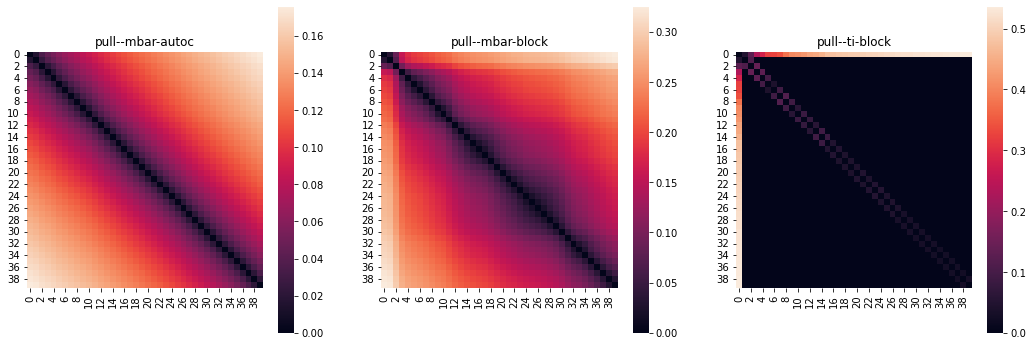

In [8]:
FE.plot_SEMatrix('pull')